Introduction


In this notebook, I shall conduct a very basic attempt at topic modelling this Spooky Author dataset. Topic modelling is the process in which we try uncover abstract themes or "topics" based on the underlying documents and words in a corpus of text. I will introduce two standard topic modelling techniques here with the first technique known as Latent Dirichlet Allocation (LDA)  I will also take the opportunity to introduce some Natural Language Processing basics such as Tokenization, Stemming and vectorization of the raw text which should also hopefully come in handy when making predictions with learning models.

The outline of this notebook is as follows:

Exploratory Data Analysis (EDA) and Wordclouds - Analyzing the data by generating simple statistics such word frequencies over the different authors as well as plotting some wordclouds (with image masks).
Natural Language Processing (NLP) with NLTK (Natural Language Toolkit) - Introducing basic text processing methods such as tokenizations, stop word removal, stemming and vectorizing text via term frequencies (TF) as well as the inverse document frequencies (TF-IDF)

Topic Modelling with LDA.

In [2]:
import pandas as pd
import numpy as np



In [8]:
train_data = pd.read_csv(r"C:\Users\52054867\machine learning\LDA\spooky-author-identification\train\train.csv")

In [9]:
train_data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


According to the competition page there are three distinct author initials we have already been provided with a mapping of these initials to the actual author which is as follows:

(Links to their Wikipedia page profiles if you click on their names)

EAP - Edgar Allen Poe : American writer who wrote poetry and short stories that revolved around tales of mystery and the grisly and the grim. Arguably his most famous work is the poem - "The Raven" and he is also widely considered the pioneer of the genre of the detective fiction.

HPL - HP Lovecraft : Best known for authoring works of horror fiction, the stories that he is most celebrated for revolve around the fictional mythology of the infamous creature "Cthulhu" - a hybrid chimera mix of Octopus head and humanoid body with wings on the back.

MWS - Mary Shelley : Seemed to have been involved in a whole panoply of literary pursuits - novelist, dramatist, travel-writer, biographer. She is most celebrated for the classic tale of Frankenstein where the scientist Frankenstein a.k.a "The Modern Prometheus" creates the Monster that comes to be associated with his name.

Next, let us take a look at how large the training data is:

In [10]:
print(train_data.shape)

(19579, 3)


<BarContainer object of 3 artists>

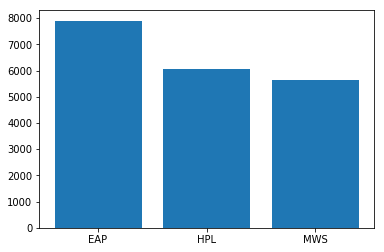

In [17]:
from matplotlib import pyplot as plt

x = train_data.author.unique()
y = train_data.author.value_counts().values

plt.bar(x,y)


WordClouds to visualise each author's work
One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here instead of dealing with an actual book or text, our words can simply be taken from the column "text"

Store the text of each author in a Python list

We first create three different python lists that store the texts of Edgar Allen Poe, HP Lovecraft and Mary Shelley respectively as follows:

In [22]:
eap = train_data[train_data.author == 'EAP']['text'].values
hpl = train_data[train_data.author == 'HPL']['text'].values
mws = train_data[train_data.author == 'MWS']['text'].values


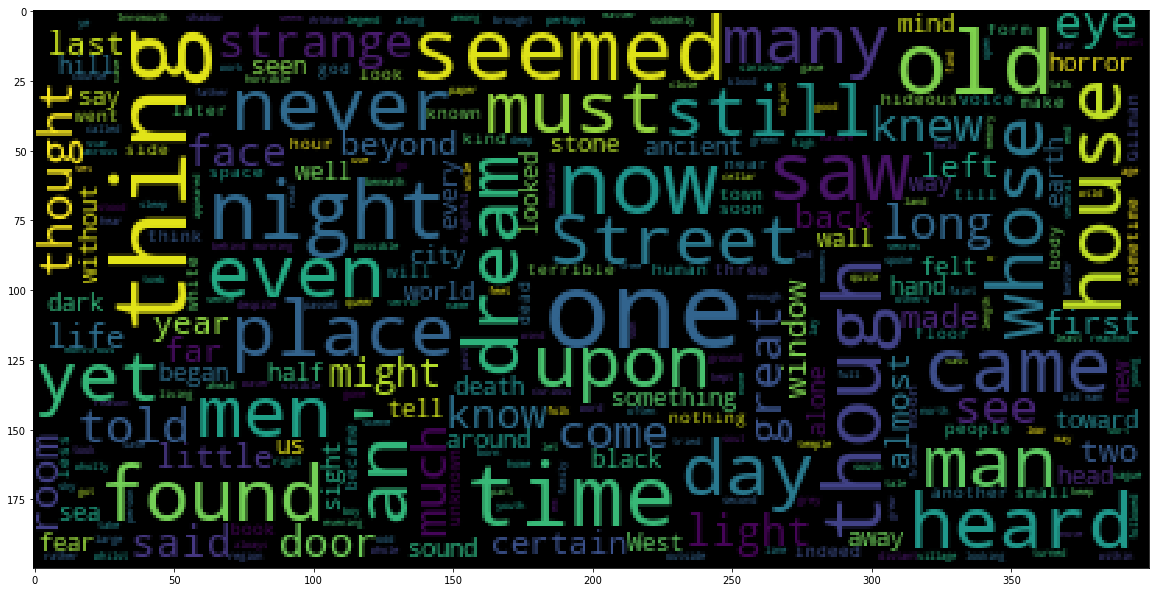

In [31]:

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(hpl))

plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wc)




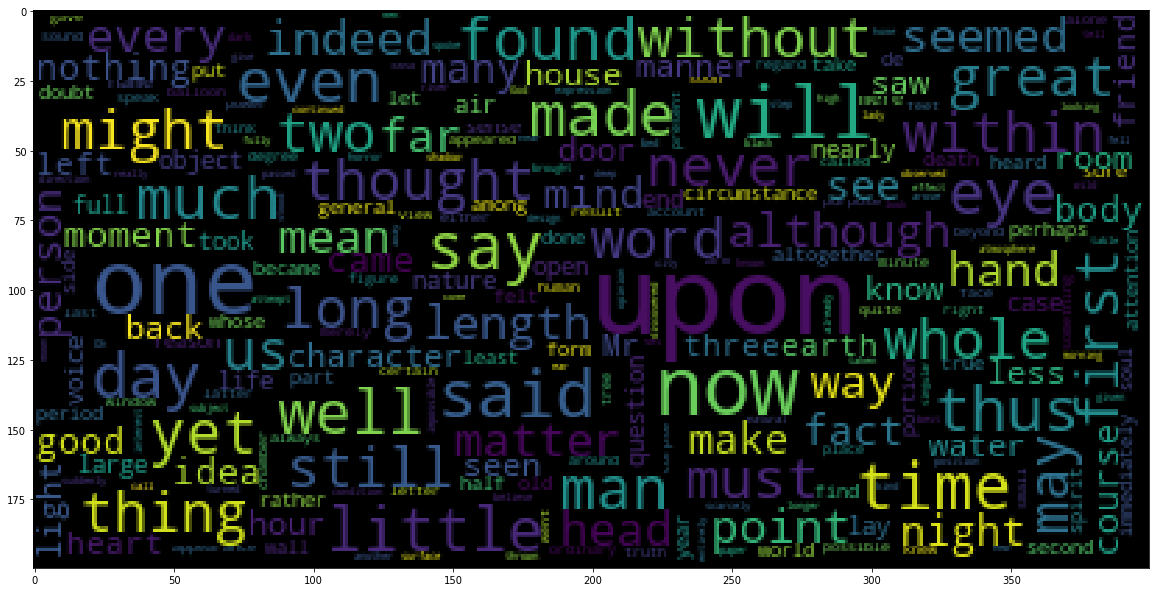

In [32]:
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(eap))

plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wc)

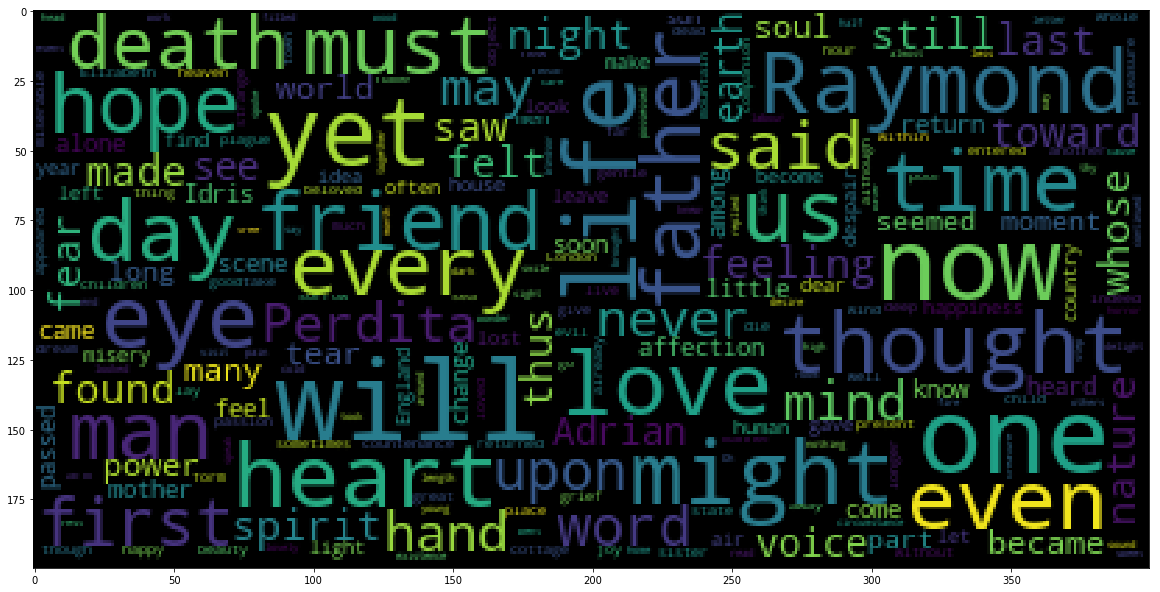

In [33]:
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(mws))

plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wc)


2. Natural Language Processing


In almost all Natural Language Processing (the field that explores interactions between a computer and human languages) tasks that you will come across (be it topic modelling, or word clustering or document-text classification etc), one will generally always have to undergo these few pre-processing steps to convert the input raw text into a form that is readable by your model and the machine. You certainly can't expect to feed a Random Forest model a paragraph of words and expect it to immediately predict which author that paragraph came from. Behind the scenes, text pre-processing can be boiled down to these few simple steps:

Tokenization - Segregation of the text into its individual constitutent words.

Stopwords - Throw away any words that occur too frequently as its frequency of occurrence will not be useful in helping detecting relevant texts. (as an aside also consider throwing away words that occur very infrequently).

Stemming - combine variants of words into a single parent word that still conveys the same meaning

Vectorization - Converting text into vector format. One of the simplest is the famous bag-of-words approach, where you create a matrix (for each document or text in the corpus). In the simplest form, this matrix stores word frequencies (word counts) and is oft referred to as vectorization of the raw text.

Natural Language Toolkit (NLTK): To make our Natural Language Processing endeavours more convenient, let me introduce to you one of the most handy toolkits that on NLP - the Natural Language Toolkit, also more commonly referred to as the NLTK module. To import the toolkit, it is as easier as:

In [34]:
import nltk

In [36]:
# Tokenization

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Storing the entire training text in a list
text = list(train_data.text.values)


tf_vectorizer = CountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

From a standard LDA model, there are really a few key parameters that we have to keep in mind and consider programmatically tuning before we invoke the model:

n_components: The number of topics that you specify to the model

$\alpha$ parameter: This is the dirichlet parameter that can be linked to the document topic prior

$\beta$ parameter: This is the dirichlet parameter linked to the topic word prior

In [45]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [40]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names
len(tf_feature_names)

15378

In [49]:
len(lda.components_)

11

In [52]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)
        
print_top_words(lda,tf_feature_names , 20)


Topic #0:house strange death heart mother till old windows age large stood greater hand year bed just eyes placed certain child

Topic #1:mind let went time scene speak sleep change far replied saw life got affection dear said horrible yes easily caused

Topic #2:soon great high people fact little believe case return think make felt self sir degree coming delight old ordinary sure

Topic #3:like time came eyes earth heard light head night day come new life did body human horror long dead saw

Topic #4:moment life away moon wild country man young means point little death died appeared england misery die entered present thrown

Topic #5:years long far hope left sea mr place having possible beneath took stone nearly object hand account eye feet happy

Topic #6:continued word character man best general perdita discovered sought oh necessary god followed work design fate spent children courage altogether

Topic #7:knew matter said know better close gave period given doubt friend course rea

In [53]:
lda_result = lda.transform(tf)

In [58]:
lda_result[0]
lda_result.shape

(19579L, 11L)

In [78]:
train_data['topic'] =lda_result.argmax(axis=1)

train_data

,id,text,author,topic
0,id26305,"This process, however, afforded me no means of...",EAP,2
1,id17569,It never once occurred to me that the fumbling...,HPL,2
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,5
3,id27763,How lovely is spring As we looked from Windsor...,MWS,5
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,5
5,id22965,"A youth passed in solitude, my best years spen...",MWS,6
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,1
7,id13515,The surcingle hung in ribands from my body.,EAP,3
8,id19322,I knew that you could not say to yourself 'ste...,EAP,2
9,id00912,I confess that neither the structure of langua...,MWS,5


In [81]:
train_data.text[19578]
#Topic #3:like time came eyes earth heard light head night day come new life did body human horror long dead saw


'He laid a gnarled claw on my shoulder, and it seemed to me that its shaking was not altogether that of mirth.'

In [83]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]


first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

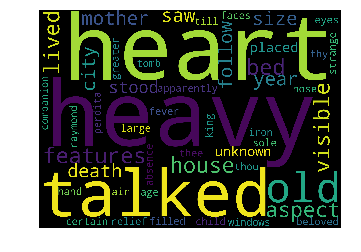

In [84]:
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()